<a href="https://colab.research.google.com/github/gomachinelearning/Blogs/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Orly Esteban**, MS Data Science, Indiana University <br/>
Aldie, VA

This code accompanies Orly's blog post at https://medium.com/@orly_esteban/unsupervised-learning-fb6c6d92ea95

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [2]:
X = data.data[:,(2,3)]
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
import numpy as np

# shuffle the dataset
shuffle_idx = np.arange(np.size(y))
np.random.shuffle(shuffle_idx)
X = X[shuffle_idx]
y= y[shuffle_idx]
#use k-means to predict each datarow's classification
#y_pred contains the datarow's predicted cluster index
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit(X).predict(X)

In [0]:
import matplotlib.pyplot as plt
def plot_k_means(model, X,y_pred, k):
  #draw the cluster boundaries
  x1s = np.linspace(0,7, 1000)
  x2s = np.linspace(0,2.5, 1000)
  x1_mesh, x2_mesh = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
  y_new = model.predict(X_new)
  plt.contourf(x1_mesh, x2_mesh, y_new.reshape(x1_mesh.shape) ,cmap="Pastel2")
  plt.contour(x1_mesh, x2_mesh, y_new.reshape(x1_mesh.shape),linewidths=1, colors='k')
#plot the data points
  plt.scatter(X[:,0], X[:,1],c=y_pred,marker='.' )
#label the axes
  plt.xlabel('petal length')
  plt.ylabel('petal width')
#add title
  plt.title ('k = {} clusters'.format(k))

Text(0.75, 0.85, 'Cluster 2')

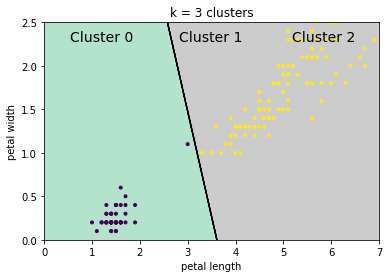

In [5]:
#draw on a clean slate
plt.clf()
#plot the results
plot_k_means(kmeans,X,y_pred, 3)
#label the  boundaries
plt.annotate('Cluster 0', xytext=(0.18,0.85),xycoords='figure fraction',xy=(0,0),fontsize=14)
plt.annotate('Cluster 1', xytext=(0.46,0.85),xycoords='figure fraction',xy=(0,0),fontsize=14)
plt.annotate('Cluster 2', xytext=(0.75,0.85),xycoords='figure fraction',xy=(0,0),fontsize=14)

<Figure size 432x288 with 0 Axes>

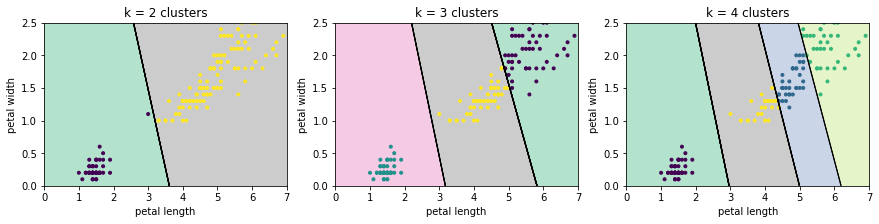

In [6]:
plt.clf()
plt.figure(figsize=(20,3))
for k in range(2,5):
  plt.subplot(1,4,k-1)
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
  y_pred = kmeans.predict(X)
  
  plot_k_means(kmeans,X,y_pred, k)
plt.show()

Text(0, 0.5, 'Inertia')

<Figure size 432x288 with 0 Axes>

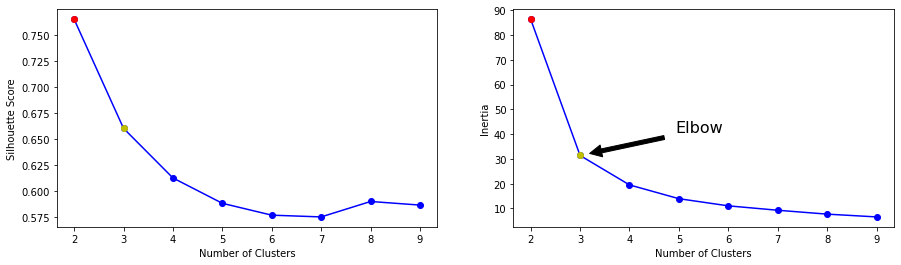

In [7]:
# variables to store silhouette score and inertia for different clusters
inertias = []
scores = []
from sklearn.metrics import silhouette_score
# Calculate silhouette scores and inertia for different number of clusters
for cluster_number in range(2,10):
  kmeans = KMeans(n_clusters=cluster_number, random_state=42).fit(X)
  inertias.append(kmeans.inertia_)  
  scores.append(silhouette_score(X,kmeans.labels_))
#plot the results
plt.clf()
plt.figure(figsize=(15,4))
#plot Silhouette Score
plt.subplot(121)
plt.plot(range(2,10), scores, 'bo-')
plt.plot(2, scores[0], 'ro-')
plt.plot(3, scores[1], 'yo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
#plot Inertia
plt.subplot(122)
plt.plot(range(2,10), inertias, 'bo-')
plt.annotate(s='Elbow',xy=(3, inertias[1]),
             xytext=(0.75, 0.50),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.plot(2, inertias[0], 'ro-')
plt.plot(3, inertias[1], 'yo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

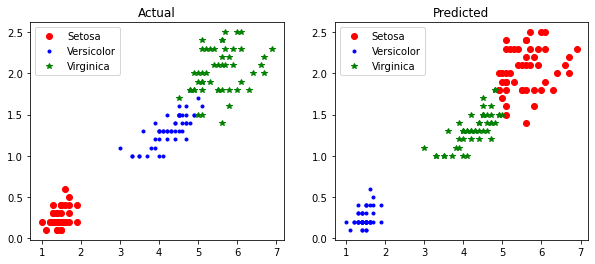

In [8]:
plt.figure(figsize=(10,4))
# actual 
plt.subplot(121)
plt.plot(X[y==0,0], X[y==0,1], 'ro', label='Setosa')
plt.plot(X[y==1,0], X[y==1,1], 'b.', label='Versicolor')
plt.plot(X[y==2,0], X[y==2,1], 'g*', label='Virginica')
plt.legend(loc='upper left')
plt.title('Actual')
# predicted
plt.subplot(122)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
y_pred = kmeans.predict(X)
plt.plot(X[y_pred==0,0], X[y_pred==0,1], 'ro', label='Setosa')
plt.plot(X[y_pred==1,0], X[y_pred==1,1], 'b.', label='Versicolor')
plt.plot(X[y_pred==2,0], X[y_pred==2,1], 'g*', label='Virginica')
plt.legend(loc='upper left')
plt.title('Predicted')
plt.show()

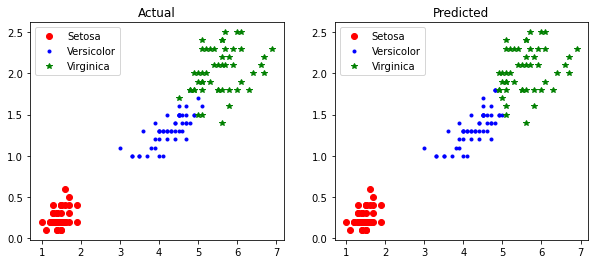

In [9]:
plt.figure(figsize=(10,4))

# actual 
plt.subplot(121)
plt.plot(X[y==0,0], X[y==0,1], 'ro', label='Setosa')
plt.plot(X[y==1,0], X[y==1,1], 'b.', label='Versicolor')
plt.plot(X[y==2,0], X[y==2,1], 'g*', label='Virginica')
plt.legend(loc='upper left')
plt.title('Actual')

# predicted
plt.subplot(122)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
y_pred = kmeans.predict(X)
y_pred_new= np.copy(y_pred)

# fixing the labels

for i in range(np.size(y_pred_new)):
  if y_pred_new[i] ==  0:
    y_pred_new[i] = 2      
  elif y_pred_new[i] ==  1:
    y_pred_new[i] = 0
  else: 
    y_pred_new[i] = 1  

plt.plot(X[y_pred_new==0,0], X[y_pred_new==0,1], 'ro', label='Setosa')
plt.plot(X[y_pred_new==1,0], X[y_pred_new==1,1], 'b.', label='Versicolor')
plt.plot(X[y_pred_new==2,0], X[y_pred_new==2,1], 'g*', label='Virginica')

plt.legend(loc='upper left')
plt.title('Predicted')
plt.show()

In [10]:
sum(y==y_pred_new) * 100 / len(y)

96.0

In [0]:
from sklearn.cluster import MiniBatchKMeans
from timeit import timeit
run_time_full = []
run_time_mini=[]
run_time_elkan = []
max_k = 25
for k in range(1, max_k):
    kmeans_ = KMeans(n_clusters=k, random_state=42,algorithm='full')
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    elkan_kmeans = KMeans(n_clusters=k, random_state=42 ,algorithm='elkan')
    run_time_full.append(timeit("kmeans_.fit(X)", number=10, globals=globals()))
    run_time_mini.append(timeit("minibatch_kmeans.fit(X)", number=10, globals=globals()))
    run_time_elkan.append(timeit("elkan_kmeans.fit(X)", number=10, globals=globals()))

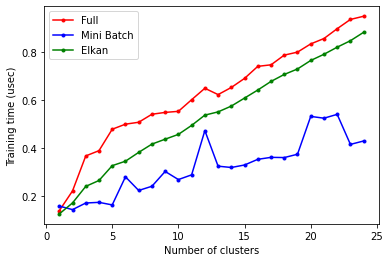

In [12]:
plt.clf()
plt.plot(range(1,max_k),run_time_full, 'r.-' , label='Full' )
plt.plot(range(1,max_k),run_time_mini, 'b.-' , label = 'Mini Batch' )
plt.plot(range(1,max_k),run_time_elkan, 'g.-', label = 'Elkan' )
plt.xlabel('Number of clusters')
plt.ylabel('Training time (usec)')
plt.legend(loc='upper left')
plt.show()